### Setting up the notebook

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy import stats
from scipy.stats import iqr
from scipy.stats import pearsonr
import statsmodels as sm


### Importing data

In [2]:
salaries_data = pd.read_csv('salary.csv')
salaries_data=salaries_data.rename(columns={'male':'gender'})
dict_name={0:'woman',1:'man'}
salaries_data['gender']=salaries_data.gender.map(dict_name)
dict_name={1:'junior',2:'manager',3:'executive'}
salaries_data['position']=salaries_data.position.map(dict_name)
salaries_data.head()

,salary,exprior,yearsworked,yearsrank,market,degree,otherqual,position,gender,Field,yearsabs
0,53000.0,0,0,0,1.17,1,0,junior,man,3,0
1,58000.0,1,0,0,1.24,1,0,junior,man,2,0
2,45500.0,0,0,0,1.21,1,0,junior,man,3,2
3,35782.0,0,2,1,0.99,1,0,junior,man,4,1
4,34731.0,0,2,2,0.91,1,0,junior,man,4,1


In [3]:
salaries_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 514 entries, 0 to 513
Data columns (total 11 columns):
salary         513 non-null float64
exprior        514 non-null int64
yearsworked    514 non-null int64
yearsrank      514 non-null int64
market         514 non-null float64
degree         514 non-null int64
otherqual      514 non-null int64
position       514 non-null object
gender         514 non-null object
Field          514 non-null int64
yearsabs       514 non-null int64
dtypes: float64(2), int64(7), object(2)
memory usage: 44.3+ KB


*There are 514 respondents who gave 11 features about their employment background.*

### Missing values

In [4]:
salaries_data.isnull().sum()

salary         1
exprior        0
yearsworked    0
yearsrank      0
market         0
degree         0
otherqual      0
position       0
gender         0
Field          0
yearsabs       0
dtype: int64

*Salary is the only column that has a missing value.*

#### Looking at the salary column

In [5]:
salaries_data['salary'].isnull()
missing_values=salaries_data[salaries_data.salary.isnull()==True]
salaries_data['salary']=salaries_data['salary'].fillna(salaries_data['salary'].mean())


*There is only one missing value of salary which is the 208th entry 
but all the other features about the employee are recorded which means it is viable 
 to keep the entry.The null value is now replaced by the mean annual salary.*

### Central tendency measures

In [6]:
salary_max=salaries_data['salary'].max()
salary_min=salaries_data['salary'].min()
print('The maximum salary is',salary_max)
print('The minimum salary is',salary_min)

The maximum salary is 96156.0
The minimum salary is 29000.0


*The minimum annual salary is 29000.0 dollars*
*The maximum annual salary is 96156.0 dollars*

In [7]:
salary_mean=salaries_data['salary'].mean()
sterror_mean=stats.sem(salaries_data['salary'])
salary_median=salaries_data['salary'].median()
std_years=salaries_data['yearsworked'].std()
IQR=iqr(salaries_data['salary'])
print('The mean salary is',salary_mean)
print('The standard deviation of years worked is',std_years)
print('The mean standard error is',sterror_mean)
print('The salary median is',salary_median)
print('The interquartile range is',IQR)



The mean salary is 50863.22009783625
The standard deviation of years worked is 9.444695144169803
The mean standard error is 558.9715980665014
The salary median is 50165.5
The interquartile range is 20306.25


*The mean annual salary is 50863.22009783625 dollars.
The standard error mean is 558.9715980665014 dollars.
The salaries median is 50165.5 dollars.
The IQR is 20306.25 dollars.*

### Comparison of men and women

In [8]:
x=salaries_data['gender'].value_counts()
gender=pd.DataFrame(x)
gender=gender.T
gender=gender.rename({'gender':'Total'})
gender




,man,woman
Total,386,128


In [9]:
woman_in_executive=len(salaries_data[(salaries_data.position=='executive')&(salaries_data.gender=='women')])
men_in_executive=len(salaries_data[(salaries_data.position=='executive')&(salaries_data.gender=='men')])
print('Women in excecutive',woman_in_executive)
print('Men in executive',men_in_executive)

Women in excecutive 0
Men in executive 0


*There are 19 women in executive and 192 men in executive. It shows that there are more men in executive than women.*

### The distribution of salary brackets

#### The histogram

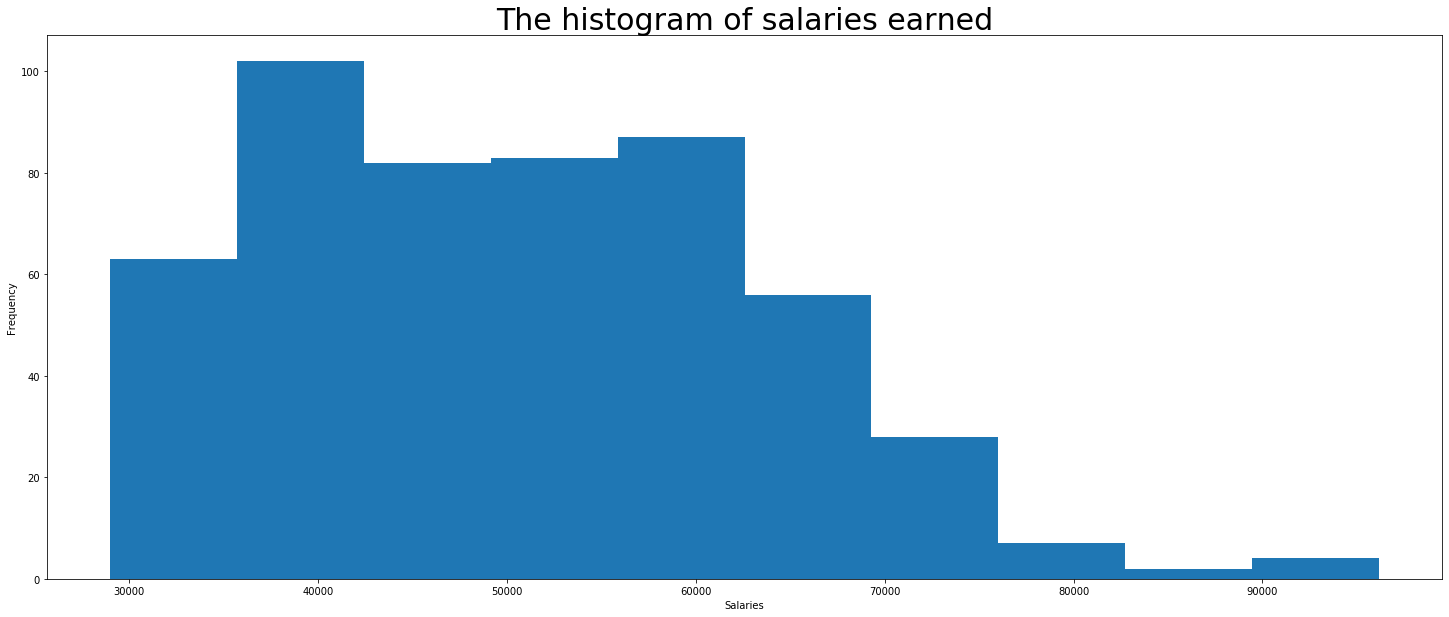

In [10]:
plt.figure(figsize=(25,10))
plt.hist(salaries_data.salary)
plt.title('The histogram of salaries earned',fontdict={'fontsize':30})
plt.xlabel('Salaries')
plt.ylabel('Frequency')
plt.rcParams.update({'font.size': 22})

*The peak of salaries is between 37000 dollars and 43000 dollars.There are no outliers in this data.
This histogram simply shows that a lot of people earn between 37000 dollars and 43000 dollars. 
Then only a few earn between 83000 dollars and 89000 dollars.This few is most likey to be the excutive and 
a lot of people are holding junior positions.*

#### Average salaries of men and women

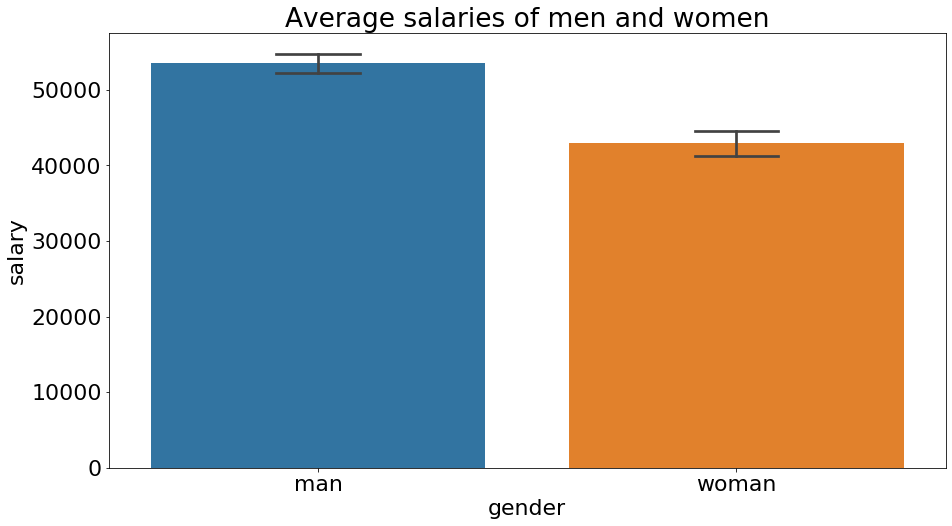

In [11]:
plt.figure(figsize=(15,8))
sns.barplot(salaries_data['gender'],salaries_data['salary'],capsize=0.2)
plt.title('Average salaries of men and women')
plt.rcParams.update({'font.size': 20})

*The length of an Error Bar helps reveal the uncertainty of a data point.
    A short Error Bar shows that values are concentrated.In this case the men's salaries
    have a shorter error bar
    , signalling that the plotted average value is more likely, 
    while a long Error Bar which in this case is the error bar for women's salaries
    indicate that the values are more spread out and less reliable.*

*The shorter error bar for men salaries means that the mean salaries represents the salaries better.
The long error bar  for women salaries means that the salaries of women are not well represented. 
However that does not indicate that the data on women is invalid*

### The relationship between Years Worked and Salary

#### Scatter plot and line of best fit

<Figure size 2160x720 with 0 Axes>

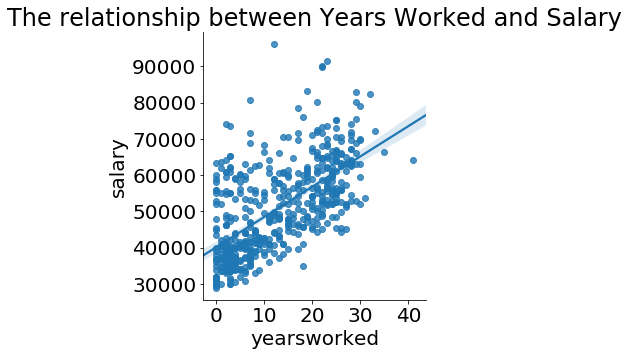

In [12]:
plt.figure(figsize=(30,10))
sns.lmplot(x='yearsworked',y='salary',data=salaries_data)
plt.title('The relationship between Years Worked and Salary')
sns.set(font_scale=1)

*The line of best fit shows a  strong relationship between years worked and the salary earned.
There are some outliers. The first one is an individual who has the current work experience between 10 years and 12 years 
and a very large salary . 
It could be that the individual holds and executive position or any other reason. There is an individual who earns
a little salary and has a longer current work experience of about 18-20 years. This could be that the individual does not have qualifications 
or other features that make other employees earn more.*

In [49]:
q_high = salaries_data["salary"].quantile(0.99)
salaries_data[(salaries_data["salary"] > q_high) & (salaries_data['yearsworked'] <= 12)]



,salary,exprior,yearsworked,yearsrank,market,degree,otherqual,position,gender,Field,yearsabs
377,96156.0,20,12,12,1.19,1,0,executive,man,1,2


*By filtering the individual by the features on the scatterplot, it shows that
the individual has prior experince of 20 year and that they hold an executive position. 
This is, to a certain extent, the reason why he is earning so much.*

In [45]:
salaries_data[(salaries_data["salary"] > 34000) & (salaries_data['salary'] <= 38000) 
              & (salaries_data['yearsworked'] <= 20) & (salaries_data['yearsworked'] >= 18)]

,salary,exprior,yearsworked,yearsrank,market,degree,otherqual,position,gender,Field,yearsabs
487,34997.0,0,18,12,0.8,1,0,manager,woman,3,49


*By filtering the individual by features on the scatter plot, 
it shows that the individual has no prior experince and has about 49 years absent from work.
Although she is a manager she earns a little and those could be major reasons why.*

#### Correlation

In [50]:
stats.pearsonr(salaries_data['yearsworked'],salaries_data['salary'])

(0.6231354820920547, 1.274779518969558e-56)

*Saying that the null hypothesis in this case is : 
    **The relationship between years worked and salary is not statistically significant**.*
    
*The correlation coefficient is 0.6231354820920547 
which shows a positive relationship between the years worked and slaries. 
The p-value is 1.274779518969558e-56 and p<0.005.
This implies that the correlation coefficient is statistically significant and thus rejecting the null hypothesis.
This is the range of values that contains with a 95% confidence the 'true' correlation coefficient.
This simply means that the more experienced an employer the higher their salary will be.*

